In [ ]:
import os
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/test.csv')

def parse_positive_sites(positive_sites_str):
    """Convert a space-separated string of positive sites into a list of integers."""
    return list(map(int, positive_sites_str.split()))

def generate_windows_and_labels(sequence, positivesites, window_size):
    """Generate windows centered on K and label them."""
    windows = []
    labels = []

    half_window = window_size // 2

    # Iterate over the sequence
    for i in range(half_window, len(sequence) - half_window):
        # Check if the center of the window is a lysine (K)
        if sequence[i] == 'K':
            window = sequence[i - half_window:i + half_window + 1]
            # Label as positive if the center position is a positive site
            if (i + 1) in positivesites:
                label = 1
            else:
                label = 0
            windows.append(window)
            labels.append(label)

    return windows, labels

# Create a directory to save the CSV files
output_dir = '/content/drive/MyDrive/Capstone Work'
os.makedirs(output_dir, exist_ok=True)

# Process each window size
for window_size in range(5, 100, 2):
    # Initialize lists to store all windows and labels
    all_windows = []
    all_labels = []

    # Process each sequence in the DataFrame
    for index, row in df.iterrows():
        sequence = row['Seq']
        positivesites = parse_positive_sites(row['PositiveSite'])
        windows, labels = generate_windows_and_labels(sequence, positivesites, window_size)
        all_windows.extend(windows)
        all_labels.extend(labels)

    # Create a DataFrame with windows and labels
    windows_df = pd.DataFrame({'Window': all_windows, 'Label': all_labels})

    # Create a sub-directory for the current window size
    window_dir = os.path.join(output_dir, f'window_size_{window_size}')
    os.makedirs(window_dir, exist_ok=True)

    # Save the DataFrame to a CSV file
    csv_file_path = os.path.join(window_dir, f'labeled_windows_{window_size}.csv')
    windows_df.to_csv(csv_file_path, index=False)

    # Print the first few rows of the DataFrame
    print(f"Window size {window_size}:")
    print(windows_df.head())

print("Labeled windows have been saved to the corresponding folders.")


Window size 5:
  Window  Label
0  LDKPI      0
1  LQKHG      1
2  GWKLG      1
3  LGKSL      0
4  VVKYD      0
Window size 7:
    Window  Label
0  SLDKPIE      0
1  LLQKHGW      1
2  HGWKLGQ      1
3  GLGKSLQ      0
4  IVVKYDV      0
Window size 9:
      Window  Label
0  ASLDKPIES      0
1  RLLQKHGWK      1
2  KHGWKLGQG      1
3  QGLGKSLQG      0
4  PIVVKYDVM      0
Window size 11:
        Window  Label
0  QASLDKPIESD      0
1  HRLLQKHGWKL      1
2  QKHGWKLGQGL      1
3  GQGLGKSLQGR      0
4  IPIVVKYDVMG      0
Window size 13:
          Window  Label
0  EQASLDKPIESDN      0
1  GHRLLQKHGWKLG      1
2  LQKHGWKLGQGLG      1
3  LGQGLGKSLQGRT      0
4  PIPIVVKYDVMGM      0
Window size 15:
            Window  Label
0  IEQASLDKPIESDNI      0
1  IGHRLLQKHGWKLGQ      1
2  LLQKHGWKLGQGLGK      1
3  KLGQGLGKSLQGRTD      0
4  DPIPIVVKYDVMGMG      0
Window size 17:
              Window  Label
0  EIEQASLDKPIESDNIG      0
1  NIGHRLLQKHGWKLGQG      1
2  RLLQKHGWKLGQGLGKS      1
3  WKLGQGLGKSLQGRTDP   

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.4 MB/s eta 0:00:00


Window Size 5 - Decision Tree:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 5 - Logistic Regression:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 5 - Random Forest:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

Window Size 5 - Gradient Boosting:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

Window Size 5 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.81
Recall: 0.89
F1 Score: 0.84

Window Size 5 - Multinomial Naive Bayes:

Accuracy: 0.56
Precision: 0.83
Recall: 0.56
F1 Score: 0.64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 5 - AdaBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 5 - Extra Trees Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 5 - XGBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7722, number of negative: 65718
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.172992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1084
[LightGBM] [Info] Number of data points in the train set: 73440, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.105147 -> initscore=-2.141299
[LightGBM] [Info] Start training from score -2.141299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 5 - LightGBM Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 5 - CatBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

Window Size 15 - Decision Tree:

Accuracy: 0.89
Precision: 0.82
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 15 - Logistic Regression:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 15 - Random Forest:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

Window Size 15 - Gradient Boosting:

Accuracy: 0.89
Precision: 0.82
Recall: 0.89
F1 Score: 0.84

Window Size 15 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.83
Recall: 0.89
F1 Score: 0.85

Window Size 15 - Multinomial Naive Bayes:

Accuracy: 0.65
Precision: 0.84
Recall: 0.65
F1 Score: 0.71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 15 - AdaBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 15 - Extra Trees Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 15 - XGBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7590, number of negative: 64572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.185590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 72162, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.105180 -> initscore=-2.140949
[LightGBM] [Info] Start training from score -2.140949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 15 - LightGBM Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 15 - CatBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

Window Size 25 - Decision Tree:

Accuracy: 0.89
Precision: 0.83
Recall: 0.89
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 25 - Logistic Regression:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 25 - Random Forest:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

Window Size 25 - Gradient Boosting:

Accuracy: 0.89
Precision: 0.86
Recall: 0.89
F1 Score: 0.85

Window Size 25 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.84
Recall: 0.89
F1 Score: 0.85

Window Size 25 - Multinomial Naive Bayes:

Accuracy: 0.69
Precision: 0.83
Recall: 0.69
F1 Score: 0.74

Window Size 25 - AdaBoost Classifier:

Accuracy: 0.89
Precision: 0.88
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 25 - Extra Trees Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 25 - XGBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7430, number of negative: 63624
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.210729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1881
[LightGBM] [Info] Number of data points in the train set: 71054, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.104568 -> initscore=-2.147465
[LightGBM] [Info] Start training from score -2.147465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 25 - CatBoost Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.84

Window Size 35 - Decision Tree:

Accuracy: 0.90
Precision: 0.83
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Window Size 35 - Logistic Regression:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 35 - Random Forest:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

Window Size 35 - Gradient Boosting:

Accuracy: 0.90
Precision: 0.83
Recall: 0.90
F1 Score: 0.85

Window Size 35 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.85
Recall: 0.89
F1 Score: 0.86

Window Size 35 - Multinomial Naive Bayes:

Accuracy: 0.73
Precision: 0.83
Recall: 0.73
F1 Score: 0.77

Window Size 35 - AdaBoost Classifier:

Accuracy: 0.90
Precision: 0.88
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 35 - Extra Trees Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 35 - XGBoost Classifier:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7309, number of negative: 62659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.353024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2126
[LightGBM] [Info] Number of data points in the train set: 69968, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.104462 -> initscore=-2.148601
[LightGBM] [Info] Start training fro

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 45 - Logistic Regression:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 45 - Random Forest:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 45 - Gradient Boosting:

Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.85

Window Size 45 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.85
Recall: 0.89
F1 Score: 0.86

Window Size 45 - Multinomial Naive Bayes:

Accuracy: 0.74
Precision: 0.83
Recall: 0.74
F1 Score: 0.78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 45 - AdaBoost Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 45 - Extra Trees Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 45 - XGBoost Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7141, number of negative: 61745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.272842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 68886, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103664 -> initscore=-2.157160
[LightGBM] [Info] Start training from score -2.157160
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Window Size 45 - LightGBM Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 45 - CatBoost Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 55 - Decision Tree:

Accuracy: 0.90
Precision: 0.85
Recall: 0.90
F1 Score: 0.86



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 55 - Logistic Regression:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 55 - Random Forest:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

Window Size 55 - Gradient Boosting:

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.86

Window Size 55 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.86
Recall: 0.89
F1 Score: 0.87

Window Size 55 - Multinomial Naive Bayes:

Accuracy: 0.75
Precision: 0.83
Recall: 0.75
F1 Score: 0.79

Window Size 55 - AdaBoost Classifier:

Accuracy: 0.90
Precision: 0.86
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 55 - Extra Trees Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 55 - XGBoost Classifier:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7049, number of negative: 60739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.286423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 67788, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103986 -> initscore=-2.153700
[LightGBM] [Info] Start training fro

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 55 - CatBoost Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 65 - Decision Tree:

Accuracy: 0.89
Precision: 0.85
Recall: 0.89
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 65 - Logistic Regression:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 65 - Random Forest:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.85

Window Size 65 - Gradient Boosting:

Accuracy: 0.90
Precision: 0.86
Recall: 0.90
F1 Score: 0.85

Window Size 65 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.86
Recall: 0.89
F1 Score: 0.86

Window Size 65 - Multinomial Naive Bayes:

Accuracy: 0.77
Precision: 0.82
Recall: 0.77
F1 Score: 0.80

Window Size 65 - AdaBoost Classifier:

Accuracy: 0.89
Precision: 0.87
Recall: 0.89
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 65 - Extra Trees Classifier:

Accuracy: 0.89
Precision: 0.80
Recall: 0.89
F1 Score: 0.85

Window Size 65 - XGBoost Classifier:

Accuracy: 0.89
Precision: 0.91
Recall: 0.89
F1 Score: 0.85

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6799, number of negative: 59906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.301272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2706
[LightGBM] [Info] Number of data points in the train set: 66705, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101926 -> initscore=-2.176001
[LightGBM] [Info] Start training fro

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Window Size 75 - Logistic Regression:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 75 - Random Forest:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 75 - Gradient Boosting:

Accuracy: 0.90
Precision: 0.87
Recall: 0.90
F1 Score: 0.86

Window Size 75 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.86
Recall: 0.89
F1 Score: 0.87

Window Size 75 - Multinomial Naive Bayes:

Accuracy: 0.78
Precision: 0.83
Recall: 0.78
F1 Score: 0.80

Window Size 75 - AdaBoost Classifier:

Accuracy: 0.90
Precision: 0.84
Recall: 0.90
F1 Score: 0.86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 75 - Extra Trees Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 75 - XGBoost Classifier:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.86

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6752, number of negative: 58819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.426202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2861
[LightGBM] [Info] Number of data points in the train set: 65571, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102972 -> initscore=-2.164626
[LightGBM] [Info] Start training fro

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 85 - Logistic Regression:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 85 - Random Forest:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

Window Size 85 - Gradient Boosting:

Accuracy: 0.90
Precision: 0.88
Recall: 0.90
F1 Score: 0.85

Window Size 85 - K-Nearest Neighbors:

Accuracy: 0.90
Precision: 0.87
Recall: 0.90
F1 Score: 0.87

Window Size 85 - Multinomial Naive Bayes:

Accuracy: 0.80
Precision: 0.83
Recall: 0.80
F1 Score: 0.81

Window Size 85 - AdaBoost Classifier:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 85 - Extra Trees Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 85 - XGBoost Classifier:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6551, number of negative: 57934
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.350899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3019
[LightGBM] [Info] Number of data points in the train set: 64485, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101590 -> initscore=-2.179687
[LightGBM] [Info] Start training fro

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Window Size 95 - Logistic Regression:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 95 - Random Forest:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

Window Size 95 - Gradient Boosting:

Accuracy: 0.90
Precision: 0.88
Recall: 0.90
F1 Score: 0.85

Window Size 95 - K-Nearest Neighbors:

Accuracy: 0.89
Precision: 0.86
Recall: 0.89
F1 Score: 0.87

Window Size 95 - Multinomial Naive Bayes:

Accuracy: 0.81
Precision: 0.83
Recall: 0.81
F1 Score: 0.82

Window Size 95 - AdaBoost Classifier:

Accuracy: 0.90
Precision: 0.88
Recall: 0.90
F1 Score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 95 - Extra Trees Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Window Size 95 - XGBoost Classifier:

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.85

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6398, number of negative: 57020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.355905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3170
[LightGBM] [Info] Number of data points in the train set: 63418, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100886 -> initscore=-2.187417
[LightGBM] [Info] Start training fro

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Window Size 95 - CatBoost Classifier:

Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85



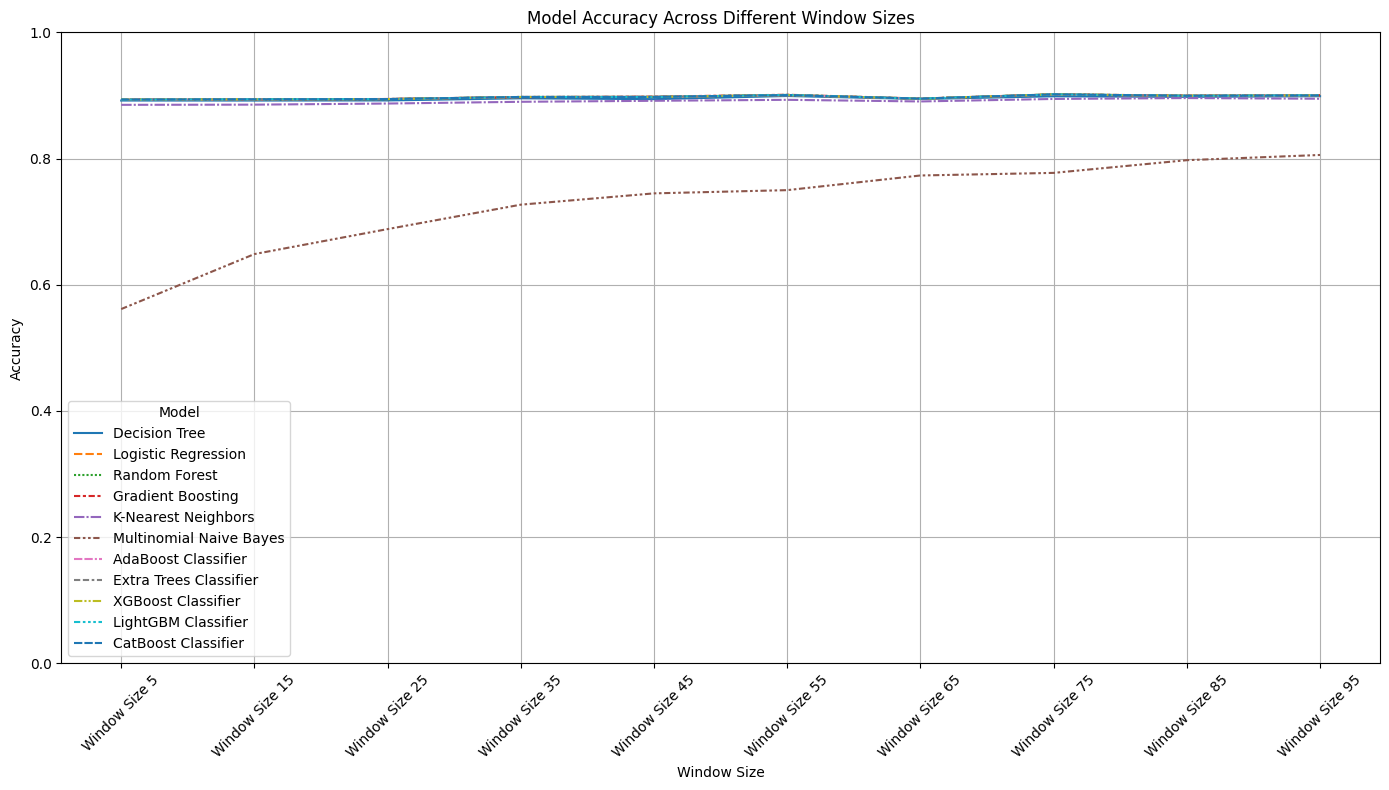

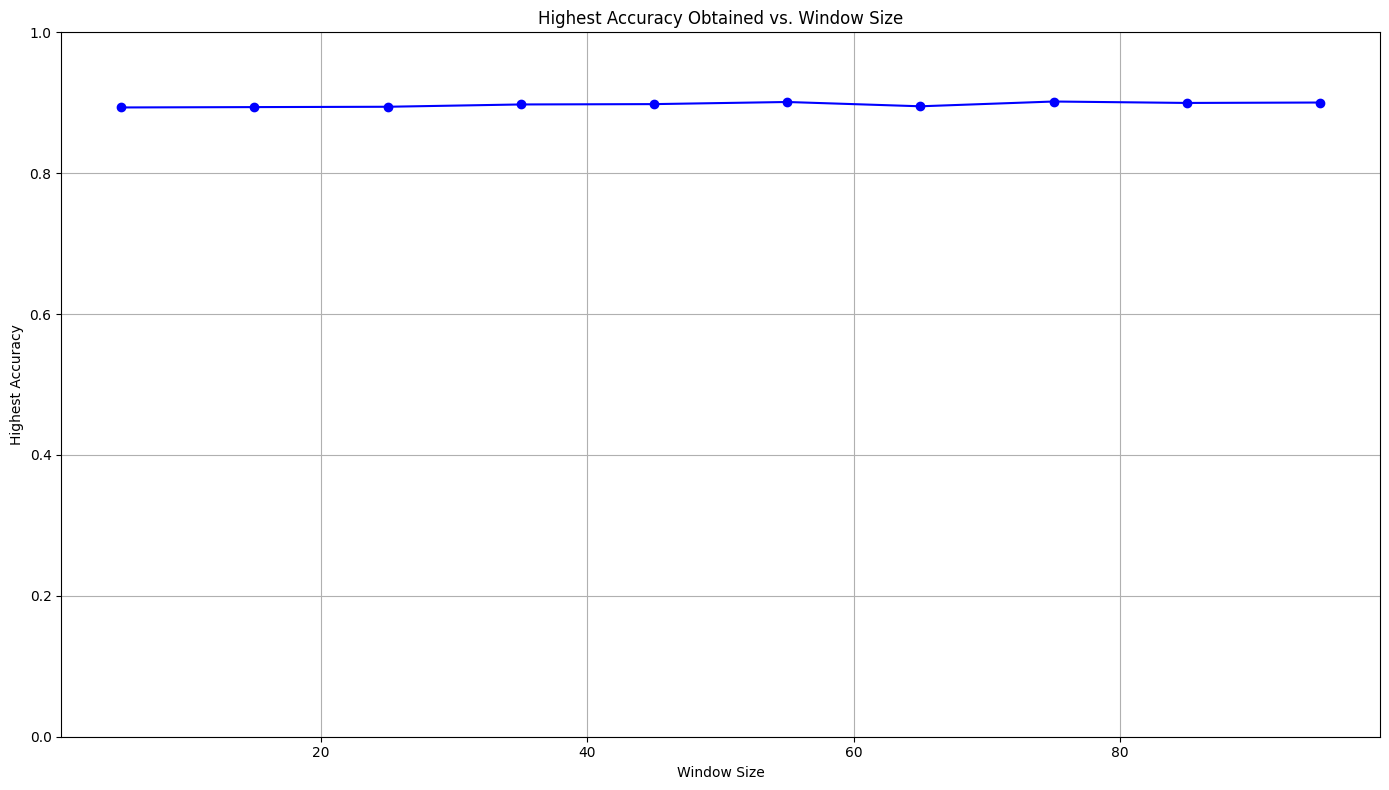

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the models and their parameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(penalty='l2', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Multinomial Naive Bayes': MultinomialNB(),
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost Classifier': xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'LightGBM Classifier': lgb.LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    'CatBoost Classifier': CatBoostClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, verbose=0)
}

# Fixed list of 20 standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Function to compute AAC features
def aac_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    aa_counts = Counter(seq)
    total_aa = len(seq)
    aa_percentages = [(aa_counts[aa] / total_aa) * 100 if total_aa > 0 else 0 for aa in amino_acids]
    return [round(v, 2) for v in aa_percentages]  # Round to two decimal places

# Function to compute DPC features
def dpc_compute(seq):
    seq = seq.replace('^', '')  # Remove '^' character if present
    dipeptides = [a1 + a2 for a1 in amino_acids for a2 in amino_acids]
    dipeptide_counts = Counter(seq[i:i+2] for i in range(len(seq) - 1))
    total_dipeptides = len(seq) - 1
    dipeptide_percentages = [(dipeptide_counts[dp] / total_dipeptides) * 100 if total_dipeptides > 0 else 0 for dp in dipeptides]
    return [round(v, 2) for v in dipeptide_percentages]  # Round to two decimal places

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    return accuracy, precision, recall, f1

# Path to the directory containing window size subdirectories
base_dir = '/content/drive/MyDrive/Capstone Work'
window_sizes = range(5, 100, 10)

# Initialize dictionaries to store results
results = {model_name: [] for model_name in models.keys()}
reports = {model_name: [] for model_name in models.keys()}
highest_accuracy = []

# Read each window size directory and process
for window_size in window_sizes:
    window_dir = os.path.join(base_dir, f'window_size_{window_size}')
    csv_file_path = os.path.join(window_dir, f'labeled_windows_{window_size}.csv')

    if not os.path.exists(csv_file_path):
        print(f"File not found: {csv_file_path}")
        continue

    # Load the data
    data = pd.read_csv(csv_file_path)
    X = data['Window']
    y = data['Label']

    # Convert 'Window' (string) to AAC and DPC features
    X_aac = np.array(X.apply(aac_compute).tolist())
    X_dpc = np.array(X.apply(dpc_compute).tolist())
    X_features = np.concatenate([X_aac, X_dpc], axis=1)

    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

    # Track the highest accuracy for this window size
    window_size_accuracy = {'Window Size': window_size, 'Highest Accuracy': 0}

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
        results[model_name].append(accuracy)
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
        reports[model_name].append(report)

        # Update highest accuracy
        if accuracy > window_size_accuracy['Highest Accuracy']:
            window_size_accuracy['Highest Accuracy'] = accuracy

        # Print detailed report for each model and window size
        print(f"Window Size {window_size} - {model_name}:\n")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}\n")

    highest_accuracy.append(window_size_accuracy)

# Create a DataFrame for results
results_df = pd.DataFrame(results, index=[f'Window Size {ws}' for ws in window_sizes])

# Plot the accuracies
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, palette='tab10')
plt.title('Model Accuracy Across Different Window Sizes')
plt.xlabel('Window Size')
plt.ylabel('Accuracy')
plt.xticks(ticks=np.arange(len(window_sizes)), labels=[f'Window Size {ws}' for ws in window_sizes], rotation=45)
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the results and reports to CSV files
results_df.to_csv('model_accuracies_by_window_size.csv', index=True)

# Save detailed reports
for model_name, report_list in reports.items():
    report_df = pd.DataFrame(report_list, index=[f'Window Size {ws}' for ws in window_sizes])
    report_df.to_csv(f'{model_name}_classification_reports.csv', index=True)

# Save highest accuracy results
highest_accuracy_df = pd.DataFrame(highest_accuracy)
highest_accuracy_df.to_csv('highest_accuracy_by_window_size.csv', index=False)

# Plot the highest accuracy obtained for each window size
plt.figure(figsize=(14, 8))
plt.plot(highest_accuracy_df['Window Size'], highest_accuracy_df['Highest Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Highest Accuracy Obtained vs. Window Size')
plt.xlabel('Window Size')
plt.ylabel('Highest Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig('highest_accuracy_vs_window_size.png')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

# Define the models
models = [
    'Decision Tree',
    'Logistic Regression',
    'Random Forest',
    'Gradient Boosting',
    'K-Nearest Neighbors',
    'Multinomial Naive Bayes',
    'AdaBoost Classifier',
    'Extra Trees Classifier',
    'XGBoost Classifier',
    'LightGBM Classifier',
    'CatBoost Classifier'
]

# Directory where the classification reports are saved
reports_dir = './'

# Function to parse the CSV and extract metrics
def process_report(file_path):
    df = pd.read_csv(file_path)
    print(f"Columns in {file_path}: {df.columns.tolist()}")  # Debugging line
    metrics = []
    for index, row in df.iterrows():
        window_size = row.get('Window Size', 'Unknown')  # Adjust based on actual column names
        if pd.isna(window_size):
            window_size = 'Unknown'
        try:
            # Convert string representation of dict to actual dict
            precision_dict = ast.literal_eval(row[1])
            recall_dict = ast.literal_eval(row[2])
            f1_dict = ast.literal_eval(row[3])

            metrics.append({
                'Window Size': window_size,
                'Precision': precision_dict['precision'],
                'Recall': precision_dict['recall'],
                'F1-Score': precision_dict['f1-score']
            })
        except (IndexError, ValueError, KeyError) as e:
            print(f"Error processing row {index} in {file_path}: {e}")
            continue
    return pd.DataFrame(metrics)

# Function to plot metrics
def plot_metrics(df, metric, model_name):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df, x='Window Size', y=metric, marker='o', label=model_name)
    plt.title(f'{metric} for {model_name} Across Different Window Sizes')
    plt.xlabel('Window Size')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{reports_dir}/{model_name}_{metric}_plot.png')
    plt.show()

# Process each model's report and plot
for model_name in models:
    report_file = f'{reports_dir}/{model_name}_classification_reports.csv'
    if not os.path.exists(report_file):
        print(f"File not found: {report_file}")
        continue

    # Load and process the report
    report_df = process_report(report_file)

    # Plot Precision, Recall, and F1-Score
    if not report_df.empty:
        plot_metrics(report_df, 'Precision', model_name)
        plot_metrics(report_df, 'Recall', model_name)
        plot_metrics(report_df, 'F1-Score', model_name)
    else:
        print(f"No data to plot for {model_name}.")


Columns in .//Decision Tree_classification_reports.csv: ['Unnamed: 0', '0', '1', 'accuracy', 'macro avg', 'weighted avg']
Error processing row 0 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8918845315904139
Error processing row 1 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8918574358405853
Error processing row 2 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8920288223373114
Error processing row 3 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8954379144751886
Error processing row 4 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8940889559865288
Error processing row 5 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8990971853425385
Error processing row 6 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8942855429633627
Error processing row 7 in .//Decision Tree_classification_reports.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

# Define the models
models = [
    'Decision Tree',
    'Logistic Regression',
    'Random Forest',
    'Gradient Boosting',
    'K-Nearest Neighbors',
    'Multinomial Naive Bayes',
    'AdaBoost Classifier',
    'Extra Trees Classifier',
    'XGBoost Classifier',
    'LightGBM Classifier',
    'CatBoost Classifier'
]

# Directory where the classification reports are saved
reports_dir = './'

# Function to parse the CSV and extract metrics
def process_report(file_path):
    df = pd.read_csv(file_path)
    print(f"Columns in {file_path}: {df.columns.tolist()}")  # Debugging line

    metrics = []
    for index, row in df.iterrows():
        window_size = row[0]  # This should be the 'Window Size' column
        if pd.isna(window_size):
            window_size = 'Unknown'

        try:
            # Convert string representation of dict to actual dict
            precision_dict = ast.literal_eval(row[1])
            recall_dict = ast.literal_eval(row[2])
            f1_dict = ast.literal_eval(row[3])

            metrics.append({
                'Window Size': window_size,
                'Precision': precision_dict['precision'],
                'Recall': precision_dict['recall'],
                'F1-Score': precision_dict['f1-score']
            })
        except (IndexError, ValueError, KeyError) as e:
            print(f"Error processing row {index} in {file_path}: {e}")
            continue
    return pd.DataFrame(metrics)

# Function to plot metrics
def plot_metrics(df, metric, model_name):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df, x='Window Size', y=metric, marker='o', label=model_name)
    plt.title(f'{metric} for {model_name} Across Different Window Sizes')
    plt.xlabel('Window Size')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{reports_dir}/{model_name}_{metric}_plot.png')
    plt.show()

# Process each model's report and plot
for model_name in models:
    report_file = f'{reports_dir}/{model_name}_classification_reports.csv'
    if not os.path.exists(report_file):
        print(f"File not found: {report_file}")
        continue

    # Load and process the report
    report_df = process_report(report_file)

    # Plot Precision, Recall, and F1-Score
    if not report_df.empty:
        plot_metrics(report_df, 'Precision', model_name)
        plot_metrics(report_df, 'Recall', model_name)
        plot_metrics(report_df, 'F1-Score', model_name)
    else:
        print(f"No data to plot for {model_name}.")


Columns in .//Decision Tree_classification_reports.csv: ['Unnamed: 0', '0', '1', 'accuracy', 'macro avg', 'weighted avg']
Error processing row 0 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8918845315904139
Error processing row 1 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8918574358405853
Error processing row 2 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8920288223373114
Error processing row 3 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8954379144751886
Error processing row 4 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8940889559865288
Error processing row 5 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8990971853425385
Error processing row 6 in .//Decision Tree_classification_reports.csv: malformed node or string: 0.8942855429633627
Error processing row 7 in .//Decision Tree_classification_reports.